<a href="https://colab.research.google.com/github/GabrielPKJK/lia1_2025_1/blob/main/Entregas%20-%20Gabriel%20Honorato/Lia_Aula09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

Fonte de dados

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data)

**Carregando os dados de Treino e Teste**



In [10]:
from google.colab import files
import zipfile
import os

files.upload()

os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Definindo permissões corretas
!chmod 600 /root/.kaggle/kaggle.json

# Instalando o pacote Kaggle
!pip install kaggle

!kaggle competitions download -c dogs-vs-cats

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('dogs-vs-cats')

with zipfile.ZipFile('dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('dogs-vs-cats/train')  # Extrai para a pasta 'train'

# Extrair o arquivo test1.zip (se encontrado)
with zipfile.ZipFile('dogs-vs-cats/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('dogs-vs-cats/test')  # Extrai para a pasta 'test'


Saving kaggle.json to kaggle.json
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import os
import shutil

# Criar diretórios se não existirem
os.makedirs('/content/dogsvscats/train/cats', exist_ok=True)
os.makedirs('/content/dogsvscats/train/dogs', exist_ok=True)

# Caminho para a pasta onde todas as imagens estão juntas
source_folder = "/content/dogs-vs-cats/train/train"

# Mover cada imagem para a pasta correspondente
for filename in os.listdir(source_folder):
    if "cat" in filename.lower():
        shutil.move(os.path.join(source_folder, filename), "/content/dogsvscats/train/cats/")
    elif "dog" in filename.lower():
        shutil.move(os.path.join(source_folder, filename), "/content/dogsvscats/train/dogs/")

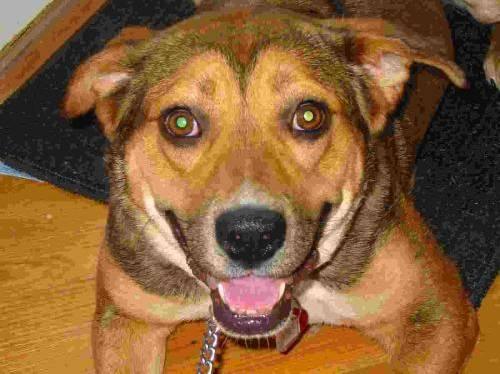

In [14]:

# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/dogsvscats/train/dogs/dog.99.jpg')

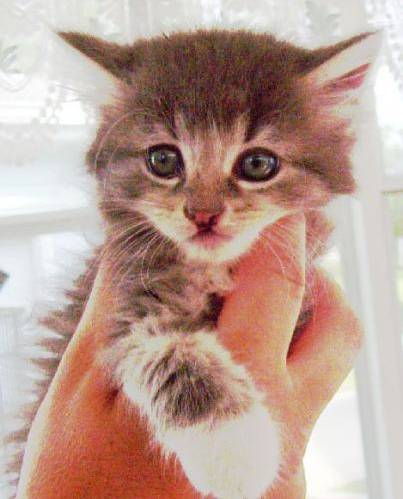

In [15]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/dogsvscats/train/cats/cat.100.jpg')


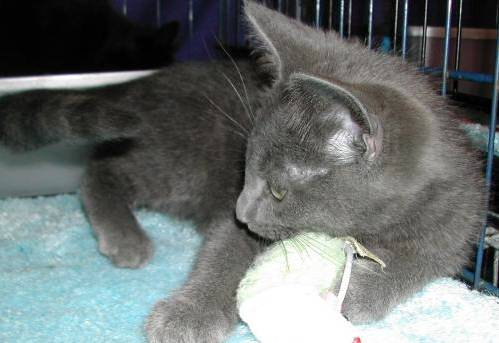

In [16]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/dogs-vs-cats/test/test1/100.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.



In [29]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [30]:
classifier = Sequential()

In [31]:
# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

# Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

# Camada de saída
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [33]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/dogsvscats/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 20000 images belonging to 2 classes.


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

**Treinamento do Modelo**

In [35]:
# Executando o treinamento
classifier.fit(
    training_set,
    steps_per_epoch=625,
    callbacks=[early_stopping],  # Ajustado com base no número total de imagens e batch size
    epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.5456 - loss: 0.6842
Epoch 2/10
  2/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7969 - loss: 0.5851

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6853 - loss: 0.5952
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7452 - loss: 0.5251
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7664 - loss: 0.4866
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 86ms/step - accuracy: 0.7893 - loss: 0.4521
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7953 - loss: 0.4356
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8183 - loss: 0.4003
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8244 - loss: 0.3945
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8205 - loss: 0.3924
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - accuracy: 0.8308 - loss: 0.3739


Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.


**Teste do Modelo**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
Previsão: Gato.
Acurácia: 87.47 %.


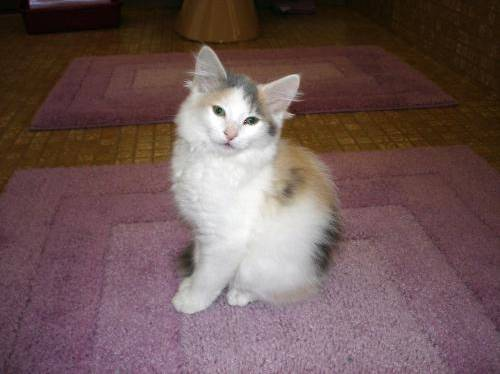

In [36]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/dogs-vs-cats/test/test1/10.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/dogs-vs-cats/test/test1/10.jpg')


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.